# **Maximum Likelihood Estimation**

#### **The way to know the parameters of your model**

When fitting real-world data into a model, one of the most crucial actions is estimating its parameters. Maximum Likelihood Estimation (MLE) provides powerful, general and theoretically sound estimators with reliable uncertainty estimates. It covers from linear regression up to more complex models. In this guide I will not only explain how it works, but also some usual scenerios were you would *likely* use it through Python examples.

## **1. How Does The Method Work?**

We will start by covering how MLE works, from intuition to calculation. For instance, imagine you are analyzing the height of a sample of people and you suspect it is generated by a normal distribution, but you do not know its respective parameters $\theta=(\mu, \sigma)$, where $\mu$ is the mean and $\sigma$ is the standard deviation.

### **1.1. Mathematical Explanation**

The "likelihood" is the probability of observing your actual data, assuming specific values for the parameters within $\theta$.

#### **Step 1: Assume a Model**

Because of what I said previously, you have supposed the heights come from a normal distribution and you would like to *estimate* $\mu$ and $\sigma$.

#### **Step 2: Write the Likelihood Function**

- For a single data point (person in the current example), $x_1$, from a normal distribution, this is just the value of the probability density function (PDF) (or probability mass function (PMF) in case of a discrete random variable): $P_{\theta}(x_1)$

- For the entire sample, $x_1,\dots,x_n$, the likelihood function $L_\theta$ is the joint probability of observing all your data points. If we assume the observations are independent (e.g. the height of a child it is not influenced by the height of its parents), this is the product of the individual probabilities:

$$L_\theta(x_1,\dots,x_n)=P_{\theta}(x_1)\times\cdots\times P_{\theta}(x_n)$$

It is important to note that **$L_\theta$ is a function of the parameters** ($\theta=(\mu,\sigma)$ from the example), not the data ($x_1,\dots,x_n$).

#### **Step 3: The "Maximum" Part - Find the Peak**

Now, you ask: "For which values of $\mu$ and $\sigma$ is this likelihood function $L_\theta$ the largest?". We find this maximum mathematically. Because products can be messy, we almost always work with the **Log-Likelihood** function. Since log is a monotonically increasing function, maximizing the log-likelihood is equivalent to maximizing the likelihood. Taking the log turns the product into a sum, which is much easier to differentiate:

$$\ln(L_\theta(x_1,\dots,x_n))=\ln(P_{\theta}(x_1))+\cdots+\ln(P_{\theta}(x_n))$$

#### **Step 4: Use Calculus to Find the Maximum**

To find the maximum of a function, we take its derivative with respect to the parameters, set it to zero and solve. In our example, we would need:
$$\frac{\partial\ln L_\theta}{\partial\mu}=0,\quad \frac{\partial\ln L_\theta}{\partial\sigma}=0.$$

In this case, the values of $\mu$ and $\sigma$ that satisfy these equations are the **Maximum Likelihood Estimates (MLE's)**, often denoted $\hat{\mu}_{MLE}$ and $\hat{\sigma}_{MLE}$, or simply $\hat{\mu}$ and $\hat{\sigma}$.

When the size of the sample, $n$, is large or $P_\theta$ has a complex form, we usually use software like Python or R for the MLE's. We will come back to this example later.

### **1.2. A Toy Example**

Now imagine you flip a coin 10 times and get 7 heads and 3 tails. You want to estimate the probability of getting heads: $p$.

1. **Assume a Model:** We assume the data is generated by a Bernoulli distribution of parameter $\theta=p$.

2. **Write the Likelihood Function:** The probability of getting a head given $p$ is $P_p(x)=p$, while the probability of getting a tail is $P_p(x)=1-p$. Thus, the likelihood function is
$$L_p(x_1,\dots,x_{10})=p^7(1-p)^3$$

3. **Find the Maximum:** The log of $L$ in this case is
$$\ln L_p(x_1,\dots,x_{10})=7\ln p + 3\ln (1-p)$$

4. **Use Calculus to Find the Maximum:** By differentiation, we obtain
$$\frac{\partial\ln L_p}{\partial p}=\frac{7}{p}-\frac{3}{1-p}=0\iff\frac{7}{p}=\frac{3}{1-p}=0\iff 7(1-p)=3p\iff 10p=7\iff p=0.7$$

Thus, the Maximum Likelihood Estimate for the probability of heads is $\hat{p}=0.7$. This makes perfect intuitive sense! The most likely coin, given 7 heads in 10 flips, is one that is biased to land on heads 70% of the time.

## **2. Building Models in Python**

As I stated, MLE is not a model itself; it's an estimation method for the parameters of a model. Applying when you have already decided on the structure of your model based on your data analysis is the most common case.

### **2.1. Normal Distribution**

Returning to the example of heights, you have the following dataset of 500 (independent) people:

In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize

In [2]:
# creating the height dataset
mean = 173
std = 15
size = 500

np.random.seed(42) # control randomness
heights = np.random.normal(mean, std, size)

ser = pd.Series(data=heights)
ser.head()

0    180.450712
1    170.926035
2    182.715328
3    195.845448
4    169.487699
dtype: float64

As you might note, the dataset has been created from random numbers following a normal distrution with $\mu=173$ and $\sigma=15$, both units in centimeters. However, as a data analyst, you will not usually know the parameters and will have to estimate them. The first insight of normal distribution usually comes from observing the histogram:

Text(0, 0.5, 'Count')

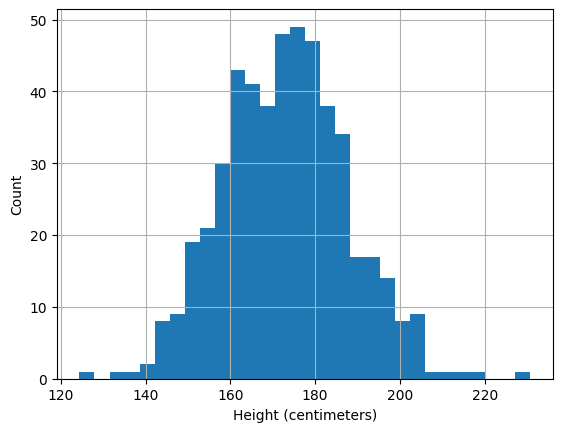

In [3]:
ax = plt.subplots()[1]
ser.hist(bins=30, ax=ax)
ax.set_xlabel('Height (centimeters)')
ax.set_ylabel('Count')

Actually, the sample mean and the sample standard deviation (with $n-1$ degrees of freedom) are good (and unbiased) estimators for the population mean and population standard deviation, respectively. With `pandas`'s function `describe`, it can be done in a single line of code:

In [4]:
ser.describe()[1:3]

mean    173.102570
std      14.718799
dtype: float64

As we can see, the sample mean is close to the actual value (173), the same for the sample standard deviation (15). Despite all, it is still a good example to explain MLE is usually done through the Python library `scipy`. There are two different approaches we will explain.

#### **An implicit approach**
As it name suggests, we do not construct the log-likelihood function at any time. You will likely use this approach when studying well-know distributions such as the normal one. `scipy.stats` offers this functionality through `fit`:

In [5]:
# implicit approach
data = ser.values   # the values from the sample
mu_mle, sigma_mle = stats.norm.fit(data)
mu_mle, sigma_mle

(np.float64(173.10256991882972), np.float64(14.704072544949403))

As we can see, $\hat{\mu}_{MLE},\,\hat{\sigma}_{MLE}$ are practically the same values as the sample mean and the sample standard deviation. Additionally, we have used `norm` to specify we want to fit a model generated by a normal distribution. You can check [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) for all the probability distributions it includes (binomial, exponential, etc.).

#### **An explicit approach**
When the probability distribution gets more complex, we have no other choice than to construct the log-likelihood function $\ln L$ on Python explicitly. It usually requires some mathematical manipulation. In our example, since we suspect heigths are generated by a normal distribution with unknown parameters $\theta=(\mu, \sigma)$, the PDF for an observation $x_i$ is

$$P_\theta(x_i)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^{\!2}\,\right).$$

Again, by assuming the observations are independent, we get

$$L_\theta(x_1,\dots,x_{500})=\prod_{i=1}^{500}\frac{1}{\sigma\sqrt{2\pi}}\exp\left( -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^{\!2}\,\right)=\left(\frac{1}{2\pi\sigma^2}\right)^{500/2}\prod_{i=1}^{500}\exp\left( -\frac{1}{2}\left(\frac{x_i-\mu}{\sigma}\right)^{\!2}\,\right).$$

Taking the logarithm, we obtain

$$\ln(L_\theta(x_1,\dots,x_{500})) = -\frac{500}{2}\ln(2\pi) - \frac{500}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{500} (x_i - \mu)^2.$$

Since $-(500/2)\ln(2\pi)$ is a constant term, maximizing $\ln L_\theta$ is equivalent to maximizing

$$l_\theta(x_1,\dots,x_{500})=-\left(\frac{500}{2}\ln(\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{500} (x_i - \mu)^2\right).$$

We usually call *objective function* to the function we want to maximize or minimize depending on the context. In this case, $l_\theta$ is the objective function we want to maximize. However, `scipy.optimize` only has a `minimize` function. This means it will minimize $l_\theta$ instead of maximizing. Since maximizing a (scalar) function $f$ is equivalent to minimizing $-f$, we will consider $-l_\theta$ the objective function to minimize within the example. Now we are able to able define it on Python:

In [6]:
# define the objective function for 500 observations
def objective_function1 (params, data):
    '''params contains the parameters we want to estimate,
    while data is the sample of 500 observations'''

    if not len(data) == 500:
        raise TypeError('data must be a 500-element array.')

    mu_mle, sigma_mle = params
    addend1 = 500/2*np.log(sigma_mle**2)
    addend2 = 1/(2*sigma_mle**2)*np.sum((data-mu_mle)**2)
    return addend1 + addend2

Note the number of height observations to introduce within `objective_function1` must be 500, otherwise the objective function would be defined wrongly. For an arbitrary number of observations $n$ we can definite in this way:

In [7]:
# define the objective function for n observations
def objective_function2 (params, data):
    '''params contains the parameters we want to estimate,
    while data is a sample of n observations'''

    mu_mle, sigma_mle = params
    n = len(data)
    addend1 = n/2*np.log(sigma_mle**2)
    addend2 = 1/(2*sigma_mle**2)*np.sum((data-mu_mle)**2)
    return addend1 + addend2

As long as `len(data)` is equal to 500, both objective functions are equivalent. But, in practice, the latter is highly preferred. Now we can compute the MLE's:

In [8]:
data = ser.values
x_0 = [173.0, 15.0]
estimations = minimize(objective_function1, x_0, args=(data,))
estimations.x

array([173.10257136,  14.70407173])

`x_0` is the initial number we use for the iterative method that actually minimizes the objective function. It should be near the actual parameters to compute the MLE's faster.

As you can note, they are practically the same as the ones from the implicit approach.

### **2.2. Linear Regression**
Simple linear regression is popular because it is a straightforward, interpretable and efficient method for understanding and predicting relationships between two variables variables: $x_i$ and $y_i$ for any observation $i$. It is assumed they are related linearly:
$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i\,\text{ where }\epsilon_i\sim\mathcal{N}(0,\sigma)\text{ (normally distributed errors)}.$$

From properties of normal distributions, this implies that
$$ y_i\sim\mathcal{N}(\beta_0 + \beta_1 x_i, \sigma^2). $$

In order to estimate the parameters $\beta_0$ and $\beta_1$, Ordinary Least Squares (OLS) is the common method. But OLS turns out to be mathematically equivalent to MLE if you assume the errors are normally distributed. 

#### **Mathematical Demonstration**

To show the statement, we can follow an analogous reasoning from the explicit approach by replacing $\theta=(\beta_0, \beta_1)$, $x_i$ with $y_i$ and $\mu_i$ with $\beta_0 + \beta_1 x_i$. Through this way, one can obtain the log-likelihood function

$$\ln(L_\theta((x_1,y_1),\dots,(x_n,y_n))) = -\left(\underbrace{\frac{n}{2}\ln(2\pi) + \frac{n}{2}\ln(\sigma^2)}_{\text{constants}} + \underbrace{\frac{1}{2\sigma^2}}_{\text{constant}} \sum_{i=1}^n (y_i-(\beta_0+\beta_1 x_i))^2\right).$$

By removing all the constant terms from $\ln L_\theta$, it follows that maximizing $\ln L_\theta$ is equivalent to minimizing 

$$\sum_{i=1}^n (y_i-(\beta_0+\beta_1 x_i))^2.$$

But this is exactly the **OLS objective**!!! It is important to remark that, in order to show the equivalence, we had to eliminate $\sigma$ from $\ln L_\theta$, whose value is unknown in practice. This is the reason why OLS is highly more preferred than MLE for simple linear regression, since the former does not have to deal with $\sigma$ at any time.

#### **Python Demonstration**

We can also use a Python example to reinforce the statement. From the [Spearman Rank Test Guide](https://github.com/jantohidalca/LinkedIn-Guides/blob/main/2025/Sep%20-%20Dec/03%20spearman-rank_test.ipynb), we can recall the example of the researcher who was investigating the relationship between daily screen time (hours) and self-reported productivity on a 10-point scale based on 1000 observations. The data was created to follow this dynamic:

$$ y_i = 6 -0.05x_i + \epsilon_i\,\text{ where }\epsilon_i\sim\mathcal{N}(0,1.5).$$

In [9]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

In [10]:
# Set a seed for reproducibility so we get the same "subtle" effect
np.random.seed(42)  # The answer to a subtle universe

# Number of samples
n_samples = 1000

# Generate the primary variable: Screen Time (hours)
# Let's assume a roughly normal distribution centered around 8 hours.
screen_time = np.random.normal(loc=8.0, scale=2.5, size=n_samples)
# Clip unrealistic values (e.g., negative hours or extremely high ones)
screen_time = np.clip(screen_time, 1, 16)

# 1. Create the "true" underlying trend: a very slight decrease
# This is the signal we want to hide in the noise.
true_beta0 = 6.0
true_beta1 = -0.05
true_trend = true_beta0 + true_beta1 * screen_time  # This creates a very weak negative linear trend

# 2. Add the tiny signal (the true_trend) to the massive noise
# We scale it down to make it very subtle and add the base value of 6.
productivity = true_trend + np.random.normal(loc=0.0, scale=1.5, size=n_samples)

# 3. Clip values to fit the intended 1-10 scale
productivity = np.clip(productivity, 1, 10)

# Create the DataFrame
df = pd.DataFrame({
    'Screen_Time_Hrs': screen_time,
    'Perceived_Productivity': productivity
})

df.head()

,Screen_Time_Hrs,Perceived_Productivity
0,9.241785,7.636944
1,7.654339,7.004234
2,9.619221,5.608484
3,11.807575,4.439216
4,7.414617,6.676604


First, we proceed with OLS:

In [11]:
# Prepare data
x= df['Screen_Time_Hrs'].values
y = df['Perceived_Productivity'].values

# Method 1: OLS using scikit-learn
ols_model = LinearRegression()
ols_model.fit(x.reshape(-1, 1), y)
b0_ols = ols_model.intercept_
b1_ols = ols_model.coef_[0]
b0_ols, b1_ols

(np.float64(6.310886720894149), np.float64(-0.07550453100807131))

Before we minimize the objective function $-\ln L_\theta$ through the explicit approach I mentioned, I would like to mention that for this specific function, the value we assign to $\sigma$ has little impact on the estimations. This is good, since in practice we would not know that $\sigma=1.5$ actually.

In [12]:
# Method 2: MLE with normal errors

# Step 1: Define the objective function for n observations
def objective_function3 (params, sigma, x, y):
    '''params contains the parameters we want to estimate,
    while data is a sample of n observations'''

    b0_mle, b1_mle = params
    n = len(y)

    addend1 = n/2*np.log(2*np.pi)
    addend2 = n/2*np.log(sigma**2)
    addend3 = 1/(2*sigma**2)*np.sum((y-(b0_mle + b1_mle*x))**2)
    return addend1 + addend2 + addend3

# Step 2: Prepare the data
sigma = 1.5 #it could be the value you want actually
initial_guess = [10.0, 0.0]
estimations = minimize(objective_function3, initial_guess, args=(sigma, x, y))
b0_mle = estimations.x[0]
b1_mle = estimations.x[1]
b0_mle, b1_mle

(np.float64(6.310887035620921), np.float64(-0.07550457433428688))

There is little difference between the coefficients. We can compare the estimations visually:

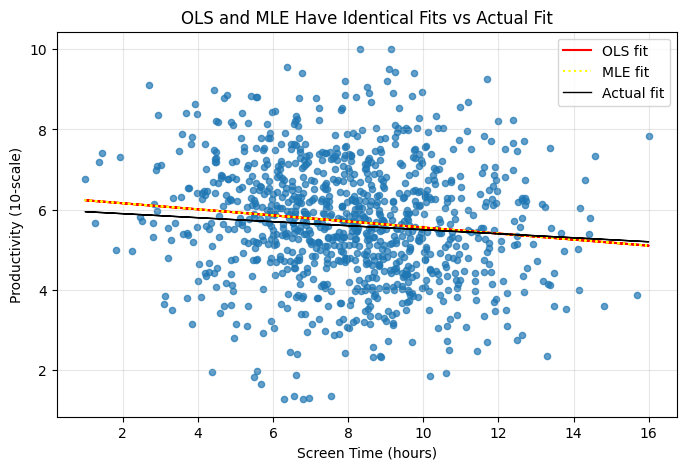

In [13]:
ax = plt.subplots(figsize=(8,5))[1]

# Plot the original data
df.plot.scatter(x='Screen_Time_Hrs', y='Perceived_Productivity', ax=ax, alpha=0.7)

# Plot the estimations by OLS
x = df['Screen_Time_Hrs']
y = b0_ols + b1_ols*x
ax.plot(x, y, color='red', label='OLS fit')

# Plot the estimations by MLE
y = b0_mle + b1_mle*x
ax.plot(x, y, color='yellow', linestyle=':', label='MLE fit')

# Plot actual coefficients
y = true_beta0 + true_beta1*x
ax.plot(x, y, color='black', linewidth=1, label='Actual fit')

plt.xlabel('Screen Time (hours)')
plt.ylabel('Productivity (10-scale)')
plt.title('OLS and MLE Have Identical Fits vs Actual Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

We can also plot $\ln L_\theta$ through contour lines to observe the distance between the actual parameters $\beta_0$ and $\beta_1$ and its MLE estimators $\hat\beta_{0,MLE}$ and $\hat\beta_{1,MLE}$.

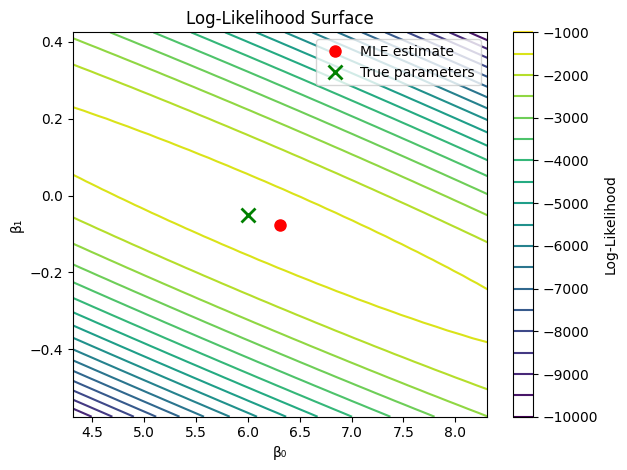

In [14]:
# Plot 2: Log-likelihood surface
beta_0_range = np.linspace(b0_mle - 2, b0_mle + 2, 50)
beta_1_range = np.linspace(b1_mle - 0.5, b1_mle + 0.5, 50)
B0, B1 = np.meshgrid(beta_0_range, beta_1_range)
Z = np.zeros_like(B0)

for i in range(len(beta_0_range)):
    for j in range(len(beta_1_range)):
        Z[j, i] = -objective_function3([B0[j, i], B1[j, i]], sigma, x, y)

plt.contour(B0, B1, Z, levels=20, cmap='viridis')
plt.colorbar(label='Log-Likelihood')
plt.plot(b0_mle, b1_mle, 'ro', markersize=8, label='MLE estimate')
plt.plot(true_beta0, true_beta1, 'gx', markersize=10, markeredgewidth=2, label='True parameters')
plt.xlabel('β₀')
plt.ylabel('β₁')
plt.title('Log-Likelihood Surface')
plt.legend()

plt.tight_layout()
plt.show()

In both plots, the estimations are really close from the actual values, less than one unit of error.

### **2.3. Logistic Regression**

Like simple linear regression, binary logistic regression is also a popular classification model. Imagine you have two categories 0 and 1. Given a feature $X_i$ of the $i^{th}-$observation, you want to determine its probability of belonging to either 0 or 1. Mathematically:

$$ p_i = P(Y_i=1|X_i) = \frac{1}{1+e^{-(\beta_0+\beta_1X_i)}}.\tag{1}$$

Equation $(1)$ is known as the ***sigmoid*** function (it plays a crucial role in neural networks). Rearranging terms we can obtain a linear expression:

$$ \log\left(\frac{p_i}{1-p_i}\right) = \beta_0 + \beta_1X_i.$$

The left-hand side of the identity is known as the ***log-odds*** or ***logits***. We want to show how MLE can estimate $\beta_0$ and $\beta_1$.

#### **Mathematical Derivation**

Like in the toy example of the guide, each observation (conditioned by its feature $X_i$) follows a Bernoulli distribution of parameter $p_i$: $P(Y_i=1|X_i)=p_i$ and $P(Y_i=0|X_i)=1-p_i$. Considering $\theta=(\beta_0,\beta_1)$ and following analogous steps to the toy example, the log-likelihood function looks like

$$ \ln L_{\theta}((X_1,Y_1),\dots,(X_n,Y_n)) = \sum_{i=1}^n [Y_i\ln(p_i)+(1-Y_i)\ln(1-p_i)]. $$

Substituting $p_i$ within Equation $(1)$, the log-likelihood can be expressed as follows:

$$ \ln L_{\theta}((X_1,Y_1),\dots,(X_n,Y_n)) = \sum_{i=1}^n \left[Y_i\ln\left(\frac{1}{1+e^{-(\beta_0+\beta_1X_i)}}\right)+(1-Y_i)\ln\left(1-\frac{1}{1+e^{-(\beta_0+\beta_1X_i)}}\right)\right]. $$

Applying properties of logarithms, the expression can be simplified to

$$ \ln L_{\theta}((X_1,Y_1),\dots,(X_n,Y_n)) = \sum_{i=1}^n [Y_i(\beta_0+\beta_1X_i)-\ln(1+e^{\beta_0+\beta_1X_i})].$$

Unfortunately, there is no closed-form solution (unlike linear regression), so we have to use numerical optimization of $\beta_0$ and $\beta_1$.

#### **Python Example**

For this example, I will generate 200 observations with a (normally distributed) random attribute $X$ and whose probability is determined by Equation $(1)$ with $\beta_0=-2$ and $\beta_1=0.8$.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from sklearn.linear_model import LogisticRegression

In [16]:
# Generate sample data
np.random.seed(42)
n = 200
true_beta_0, true_beta_1 = -2, 0.8

# Generate features
x = np.random.normal(0, 2, n)

# Generate probabilities and binary outcomes
p_true = 1 / (1 + np.exp(-(true_beta_0 + true_beta_1 * x)))
y = np.random.binomial(1, p_true, n)

First we proceed with the implicit approach using `scikit-learn`:

In [17]:
# Method 1: Using scikit-learn
sklearn_model = LogisticRegression(fit_intercept=True, penalty=None)
sklearn_model.fit(x.reshape(-1, 1), y)
b0_skl = sklearn_model.intercept_[0]
b1_skl = sklearn_model.coef_[0, 0]
b0_skl, b1_skl

(np.float64(-1.9163799152388503), np.float64(0.6257826428878305))

Now we proceed with the explicit approach to verify `scikit-learn` uses MLE internally:

In [18]:
# Method 2: MLE explicitly

# Step 1: Define the involved function
def sigmoid(z):
    """Sigmoid function to facilitate calculations"""
    return 1 / (1 + np.exp(-z))

def objective_function4(params, x, y):
    """
    Negative log-likelihood for logistic regression
    params: [beta_0, beta_1]
    """
    beta_0, beta_1 = params
    z = beta_0 + beta_1 * x
    p = sigmoid(z)
    
    # Log-likelihood: sum[ y*log(p) + (1-y)*log(1-p) ]
    log_likelihood = np.sum(y * z - np.log(1 + np.exp(z)))
    
    return -log_likelihood  # Return negative for minimization

# Step 2: Find MLE using optimization
initial_guess = [0, 0]
result = optimize.minimize(objective_function4, 
                          initial_guess, 
                          args=(x, y),
                          method='BFGS')  # Good for smooth functions

b0_mle, b1_mle = result.x
b0_mle, b1_mle

(np.float64(-1.9160961505228822), np.float64(0.6257639801509852))

There is little difference between the coefficients. We can compare the estimations visually:

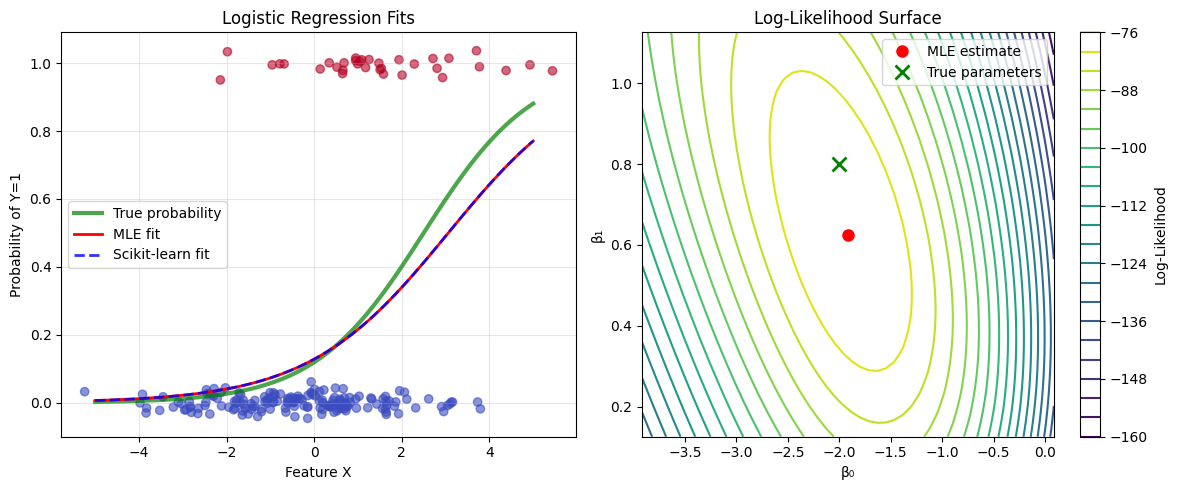

In [19]:
# Compare predictions
x_test = np.linspace(-5, 5, 100)
p_mle = sigmoid(b0_mle + b1_mle * x_test)
p_sklearn = sigmoid(b0_skl + b1_skl * x_test)
p_true_curve = sigmoid(true_beta_0 + true_beta_1 * x_test)

# Visualize the results
plt.figure(figsize=(12, 5))

# Plot 1: Data and fitted curves
plt.subplot(1, 2, 1)
# Jitter the y-values slightly for better visualization
y_jittered = y + np.random.normal(0, 0.02, n)
plt.scatter(x, y_jittered, alpha=0.6, c=y, cmap='coolwarm')
plt.plot(x_test, p_true_curve, 'g-', linewidth=3, label='True probability', alpha=0.7)
plt.plot(x_test, p_mle, 'r-', linewidth=2, label='MLE fit')
plt.plot(x_test, p_sklearn, 'b--', linewidth=2, label='Scikit-learn fit', alpha=0.8)
plt.xlabel('Feature X')
plt.ylabel('Probability of Y=1')
plt.title('Logistic Regression Fits')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Log-likelihood surface
plt.subplot(1, 2, 2)
beta_0_range = np.linspace(b0_mle - 2, b0_mle + 2, 50)
beta_1_range = np.linspace(b1_mle - 0.5, b1_mle + 0.5, 50)
B0, B1 = np.meshgrid(beta_0_range, beta_1_range)
Z = np.zeros_like(B0)

for i in range(len(beta_0_range)):
    for j in range(len(beta_1_range)):
        Z[j, i] = -objective_function4([B0[j, i], B1[j, i]], x, y)

plt.contour(B0, B1, Z, levels=20, cmap='viridis')
plt.colorbar(label='Log-Likelihood')
plt.plot(b0_mle, b1_mle, 'ro', markersize=8, label='MLE estimate')
plt.plot(true_beta_0, true_beta_1, 'gx', markersize=10, markeredgewidth=2, label='True parameters')
plt.xlabel('β₀')
plt.ylabel('β₁')
plt.title('Log-Likelihood Surface')
plt.legend()

plt.tight_layout()
plt.show()

In both plots, the estimations are really close from the actual values, less than one unit of error.